# Repair Results: Thesis Assets (Extracted from analyze_repair_results)


This notebook regenerates the **tables and figures referenced in the thesis** that originate from the repair-results analysis (see `temp/results/analyze_repair_results.ipynb`).


## Generated assets


- `tables/latex_table_time_efficiency.tex`


- `tables/latex_table_statistical_tests.tex`


- `tables/latex_table_realworld_accuracy.tex`


- `diagram/figure_repair_duration_distribution.pdf`


- `diagram/figure_stopping_conditions.pdf`


- `diagram/figure_generations_completed.pdf`


- `diagram/figure_model_comparison.pdf`


The notebook reads aggregated CSV files from `raw_data/` (produced earlier from the raw experiment logs) and surrogate model outputs from the thesis `temp/results/surrogate-model/` directory.
It also writes a copy of each generated asset to `data/` for convenience and auditing.

In [1]:
# Common imports and configuration
import shutil
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EXPORT_TO_THESIS = False  # set to True to also copy outputs into tables/, diagram/

# Hard-coded thesis root (assumes this notebook is run from temp/results_analysis_thesis/)
THESIS_ROOT = Path('/Users/stefan/Workspace/bauers-ma/thesis/').resolve()

TABLES_DIR = THESIS_ROOT / 'tables'
DIAGRAM_DIR = THESIS_ROOT / 'diagram'

# Input/output directories relative to this notebook folder
BASE_PATH = Path('.') / 'data'
BASE_PATH_RAW_DATA = Path('.') / 'raw_data'
BASE_PATH.mkdir(exist_ok=True)

# Configuration order and colors (consistent across figures)
CONFIG_ORDER = ['FI-00', 'FI-50', 'FI-70', 'TO-50', 'TO-70']
CONFIG_COLORS = {
    'FI-00': '#7f8c8d',  # Gray - Baseline
    'FI-50': '#5dade2',  # Light Blue - Fitness 50%
    'FI-70': '#2471a3',  # Dark Blue - Fitness 70%
    'TO-50': '#f39c12',  # Light Orange - Test Outcome 50%
    'TO-70': '#d35400',  # Dark Orange - Test Outcome 70%
}

# Mapping from raw surrogate configuration IDs to human-readable labels
CONFIG_MAPPING = {
    'genProg-surrogate-model-fi-00': 'FI-00',
    'genProg-surrogate-model-fi-05': 'FI-50',
    'genProg-surrogate-model-fi-07': 'FI-70',
    'genProg-surrogate-model-to-05': 'TO-50',
    'genProg-surrogate-model-to-07': 'TO-70',
}

# Plotting style for publication-quality figures
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'

# Load core aggregated CSVs
results_df = pd.read_csv(BASE_PATH_RAW_DATA / 'per_run_results.csv')
time_eff_df = pd.read_csv(BASE_PATH_RAW_DATA / 'time_efficiency_all_runs.csv')
stats_main_df = pd.read_csv(BASE_PATH_RAW_DATA / 'statistical_tests.csv')
stats_add_df = pd.read_csv(BASE_PATH_RAW_DATA / 'statistical_tests_additional.csv')

print('Loaded data sets:')
print(f'  per_run_results: {len(results_df)} rows')
print(f'  time_efficiency_all_runs: {len(time_eff_df)} rows')
print(f'  statistical_tests: {len(stats_main_df)} rows')
print(f'  statistical_tests_additional: {len(stats_add_df)} rows')
print(f'Thesis root: {THESIS_ROOT}')

Loaded data sets:
  per_run_results: 3075 rows
  time_efficiency_all_runs: 5 rows
  statistical_tests: 8 rows
  statistical_tests_additional: 8 rows
Thesis root: /Users/stefan/Workspace/bauers-ma/thesis


## Time Efficiency Table (`latex_table_time_efficiency.tex`)

In [2]:
# Prepare time efficiency data (seconds -> minutes)
time_eff = time_eff_df.copy()
time_eff['mean_time_min'] = (time_eff['mean_time_sec'] / 60).round(1)
time_eff['median_time_min'] = (time_eff['median_time_sec'] / 60).round(1)
time_eff['speedup_vs_baseline'] = time_eff['speedup_vs_baseline'].round(2)
time_eff['time_saved_pct'] = time_eff['time_saved_pct'].round(1)
time_eff = time_eff.set_index('config').loc[CONFIG_ORDER].reset_index()

# Build LaTeX table
lines = []
lines.append(r"\begin{table}")
lines.append(r"\centering")
lines.append(r"\caption{Time Efficiency Comparison Across Configurations}")
lines.append(r"\label{tab:time-efficiency}")
lines.append(r"\begin{tabular}{lcccc}")
lines.append(r"\toprule")
lines.append(r"\textbf{Config} & \textbf{Mean (min)} & \textbf{Median (min)} & \textbf{Speedup} & \textbf{Saved (\%)} \\")
lines.append(r"\midrule")

for _, row in time_eff.iterrows():
    cfg = row['config']
    mean_m = f"{row['mean_time_min']:.1f}"
    median_m = f"{row['median_time_min']:.1f}"
    # \times must be in math mode to avoid 'Missing $ inserted' in LaTeX
    speedup = f"${row['speedup_vs_baseline']:.2f}\\times$"
    if speedup.startswith('$1.00'):
        speedup = '$1.00\\times$'
    saved = f"{row['time_saved_pct']:.1f}"
    lines.append(fr"{cfg} & {mean_m} & {median_m} & {speedup} & {saved} \\")

lines.append(r"\bottomrule")
lines.append(r"\end{tabular}")
lines.append(r"\end{table}")

out_local = BASE_PATH / 'latex_table_time_efficiency.tex'
out_local.write_text("\n".join(lines))
print(f'Saved LaTeX table to: {out_local}')

if EXPORT_TO_THESIS:
    out_thesis = TABLES_DIR / out_local.name
    shutil.copy2(out_local, out_thesis)
    print(f'Copied to: {out_thesis}')

Saved LaTeX table to: data/latex_table_time_efficiency.tex


## Repair Duration Distribution (`figure_repair_duration_distribution.*`)

/var/folders/ld/bgn55ct90rbfyh1dnn5gfq9m0000gn/T/ipykernel_14827/3017417922.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(box_data, positions=range(len(CONFIG_ORDER)), labels=CONFIG_ORDER,


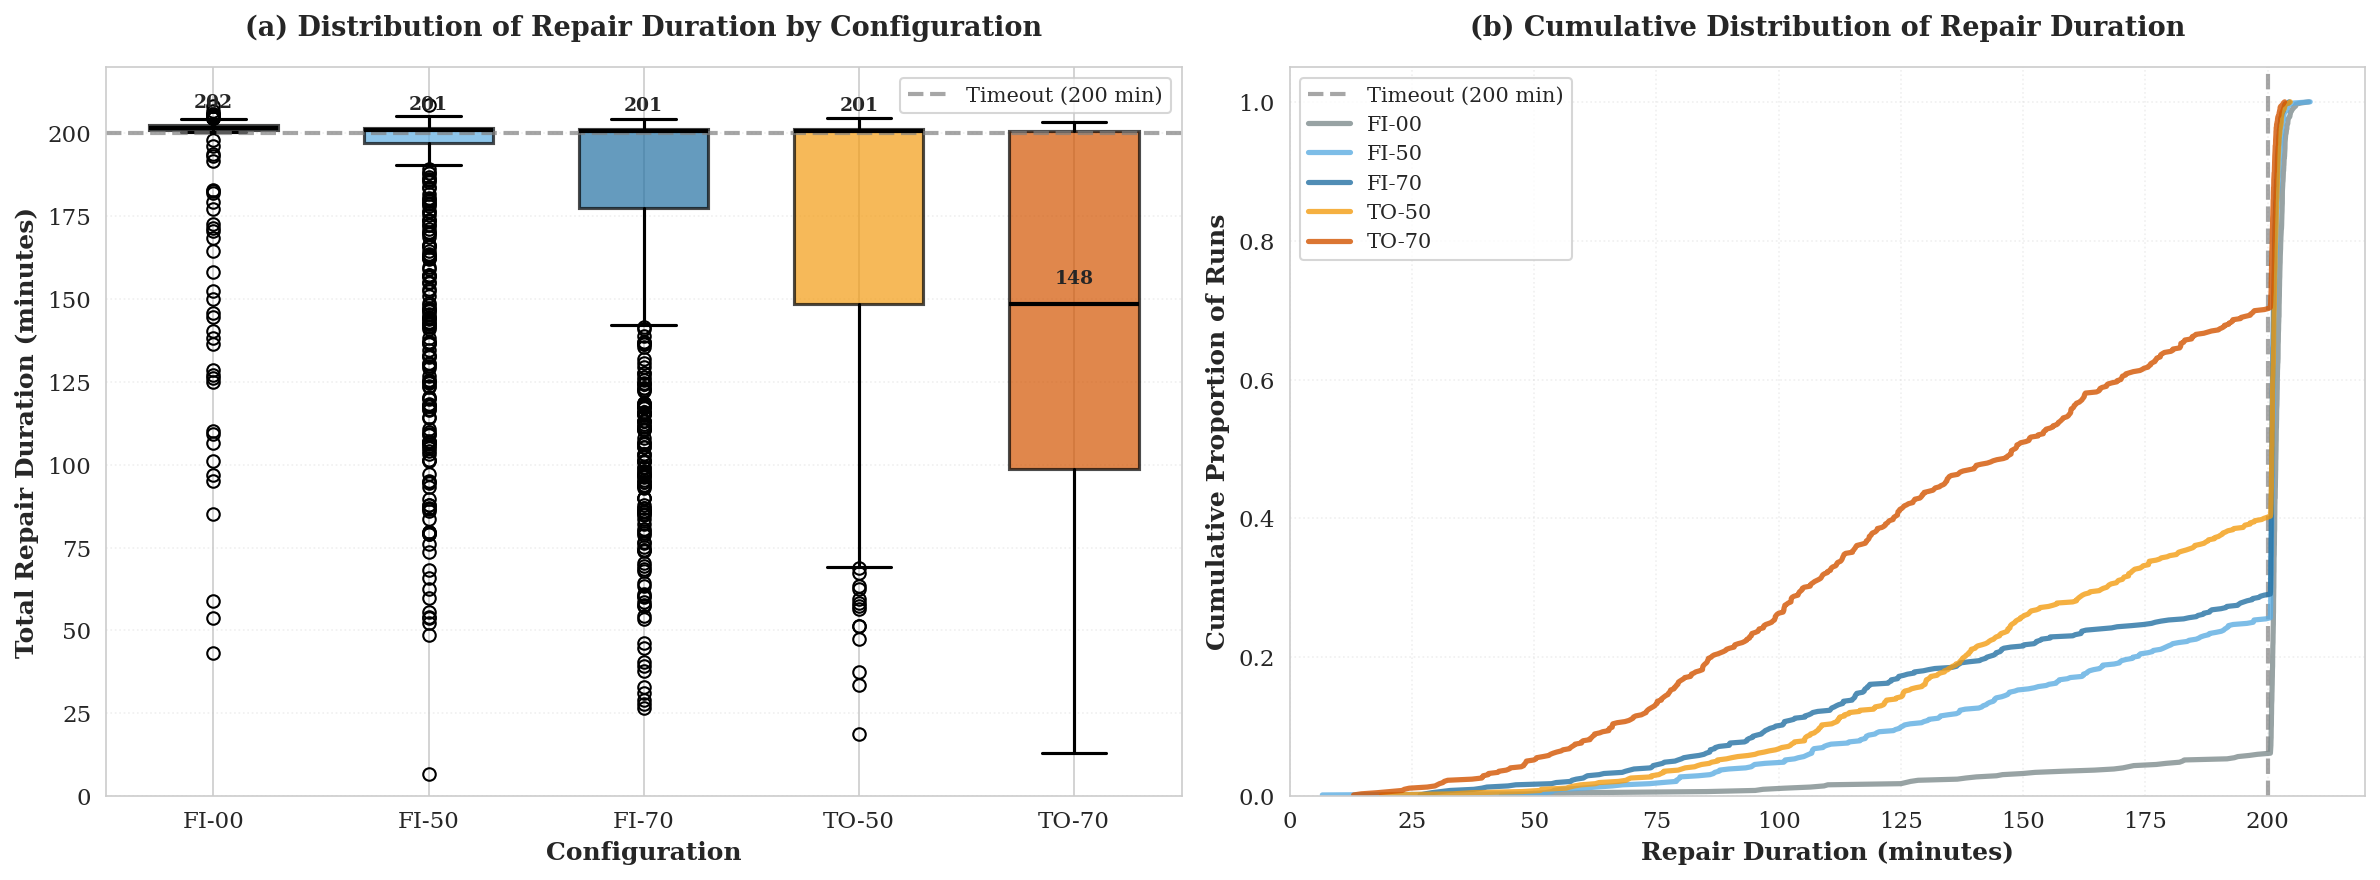

Figure saved as: data/figure_repair_duration_distribution.pdf / data/figure_repair_duration_distribution.png


In [3]:
# Prepare duration data (seconds -> minutes)
duration_data = results_df[results_df['duration_seconds'].notna()].copy()
duration_data['duration_minutes'] = duration_data['duration_seconds'] / 60.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1) Box plot by configuration
box_data = [duration_data[duration_data['config'] == cfg]['duration_minutes'].values for cfg in CONFIG_ORDER]
bp = ax1.boxplot(box_data, positions=range(len(CONFIG_ORDER)), labels=CONFIG_ORDER,
               patch_artist=True, widths=0.6,
               medianprops=dict(color='black', linewidth=2),
               boxprops=dict(linewidth=1.5),
               whiskerprops=dict(linewidth=1.5),
               capprops=dict(linewidth=1.5))
for patch, cfg in zip(bp['boxes'], CONFIG_ORDER):
    patch.set_facecolor(CONFIG_COLORS[cfg])
    patch.set_alpha(0.7)

# Timeout reference line (200 minutes)
ax1.axhline(y=200, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='Timeout (200 min)')
ax1.set_ylabel('Total Repair Duration (minutes)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Configuration', fontsize=12, fontweight='bold')
ax1.set_title('(a) Distribution of Repair Duration by Configuration', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle=':')
ax1.legend(loc='upper right', fontsize=10)
ax1.set_ylim(0, 220)

# Annotate medians
for i, cfg in enumerate(CONFIG_ORDER):
    median_val = duration_data[duration_data['config'] == cfg]['duration_minutes'].median()
    ax1.text(i, median_val + 5, f'{median_val:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2) Cumulative distribution function (CDF)
ax2.axvline(x=200, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='Timeout (200 min)')
for cfg in CONFIG_ORDER:
    cfg_durations = duration_data[duration_data['config'] == cfg]['duration_minutes'].sort_values()
    if len(cfg_durations) == 0:
        continue
    cdf = np.arange(1, len(cfg_durations) + 1) / len(cfg_durations)
    ax2.plot(cfg_durations, cdf, linewidth=2.5, label=cfg, color=CONFIG_COLORS[cfg], alpha=0.8)

ax2.set_xlabel('Repair Duration (minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Proportion of Runs', fontsize=12, fontweight='bold')
ax2.set_title('(b) Cumulative Distribution of Repair Duration', fontsize=13, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle=':')
ax2.legend(loc='upper left', fontsize=10)
ax2.set_xlim(0, 220)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
out_local_pdf = BASE_PATH / 'figure_repair_duration_distribution.pdf'
out_local_png = BASE_PATH / 'figure_repair_duration_distribution.png'
plt.savefig(out_local_pdf, dpi=300, bbox_inches='tight')
plt.savefig(out_local_png, dpi=300, bbox_inches='tight')
plt.show()
print(f'Figure saved as: {out_local_pdf} / {out_local_png}')

if EXPORT_TO_THESIS:
    out_thesis_pdf = DIAGRAM_DIR / out_local_pdf.name
    shutil.copy2(out_local_pdf, out_thesis_pdf)
    print(f'Copied to: {out_thesis_pdf}')

## Stopping Condition Distribution (`figure_stopping_conditions.*`)

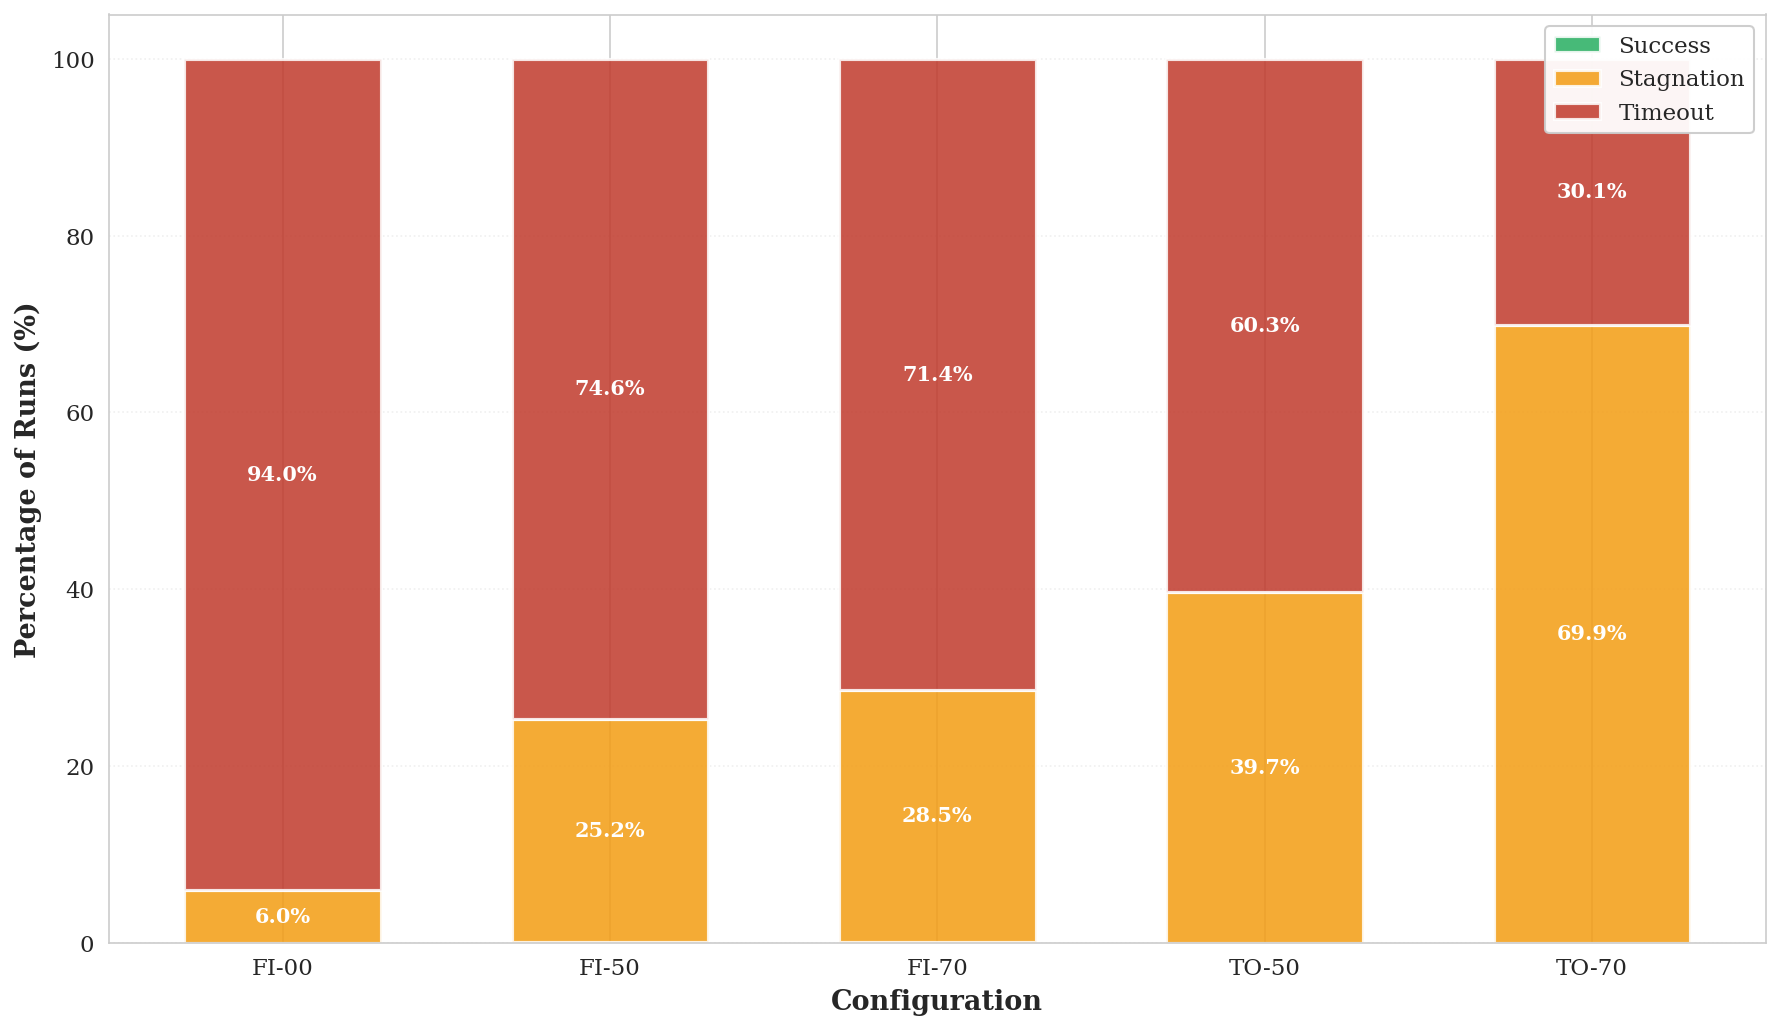

Figure saved as: data/figure_stopping_conditions.pdf / data/figure_stopping_conditions.png


In [4]:
timeout_threshold = 12000  # 200 minutes in seconds
records = []
for _, row in results_df.iterrows():
    if row['is_success']:
        condition = 'Success'
    elif pd.notna(row['duration_seconds']) and row['duration_seconds'] >= timeout_threshold - 100:
        condition = 'Timeout'
    else:
        condition = 'Stagnation'
    records.append({'config': row['config'], 'condition': condition})
stopping_df = pd.DataFrame(records)

summary = stopping_df.groupby(['config', 'condition']).size().reset_index(name='count')
totals = stopping_df.groupby('config').size().reset_index(name='total')
summary = summary.merge(totals, on='config')
summary['percentage'] = (summary['count'] / summary['total']) * 100

pivot = summary.pivot(index='config', columns='condition', values='percentage').fillna(0)
pivot = pivot.reindex(CONFIG_ORDER)
for col in ['Success', 'Stagnation', 'Timeout']:
    if col not in pivot.columns:
        pivot[col] = 0.0
pivot = pivot[['Success', 'Stagnation', 'Timeout']]

fig, ax = plt.subplots(figsize=(12, 7))
condition_colors = {'Success': '#27ae60', 'Stagnation': '#f39c12', 'Timeout': '#c0392b'}
x_pos = np.arange(len(CONFIG_ORDER))
bar_width = 0.6
bottom = np.zeros(len(CONFIG_ORDER))
for condition in ['Success', 'Stagnation', 'Timeout']:
    values = pivot[condition].values
    bars = ax.bar(x_pos, values, bar_width, bottom=bottom, label=condition,
                   color=condition_colors[condition], edgecolor='white', linewidth=1.5, alpha=0.85)
    for i, (bar, val) in enumerate(zip(bars, values)):
        if val >= 5:
            ax.text(bar.get_x() + bar.get_width()/2., bottom[i] + val/2, f'{val:.1f}%',
                    ha='center', va='center', fontweight='bold', fontsize=10, color='white')
    bottom += values

ax.set_ylabel('Percentage of Runs (%)', fontsize=13, fontweight='bold')
ax.set_xlabel('Configuration', fontsize=13, fontweight='bold')
#ax.set_title('Distribution of Stopping Conditions by Configuration', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(CONFIG_ORDER, fontsize=11)
ax.set_ylim(0, 105)
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
out_local_pdf = BASE_PATH / 'figure_stopping_conditions.pdf'
out_local_png = BASE_PATH / 'figure_stopping_conditions.png'
plt.savefig(out_local_pdf, dpi=300, bbox_inches='tight')
plt.savefig(out_local_png, dpi=300, bbox_inches='tight')
plt.show()
print(f'Figure saved as: {out_local_pdf} / {out_local_png}')

if EXPORT_TO_THESIS:
    out_thesis_pdf = DIAGRAM_DIR / out_local_pdf.name
    shutil.copy2(out_local_pdf, out_thesis_pdf)
    print(f'Copied to: {out_thesis_pdf}')

## Generations Completed (`figure_generations_completed.*`)

          mean  median
config                
FI-00   100.48    87.0
FI-50   205.80   153.0
FI-70   254.22   199.0
TO-50   156.76   146.0
TO-70   182.14   176.0


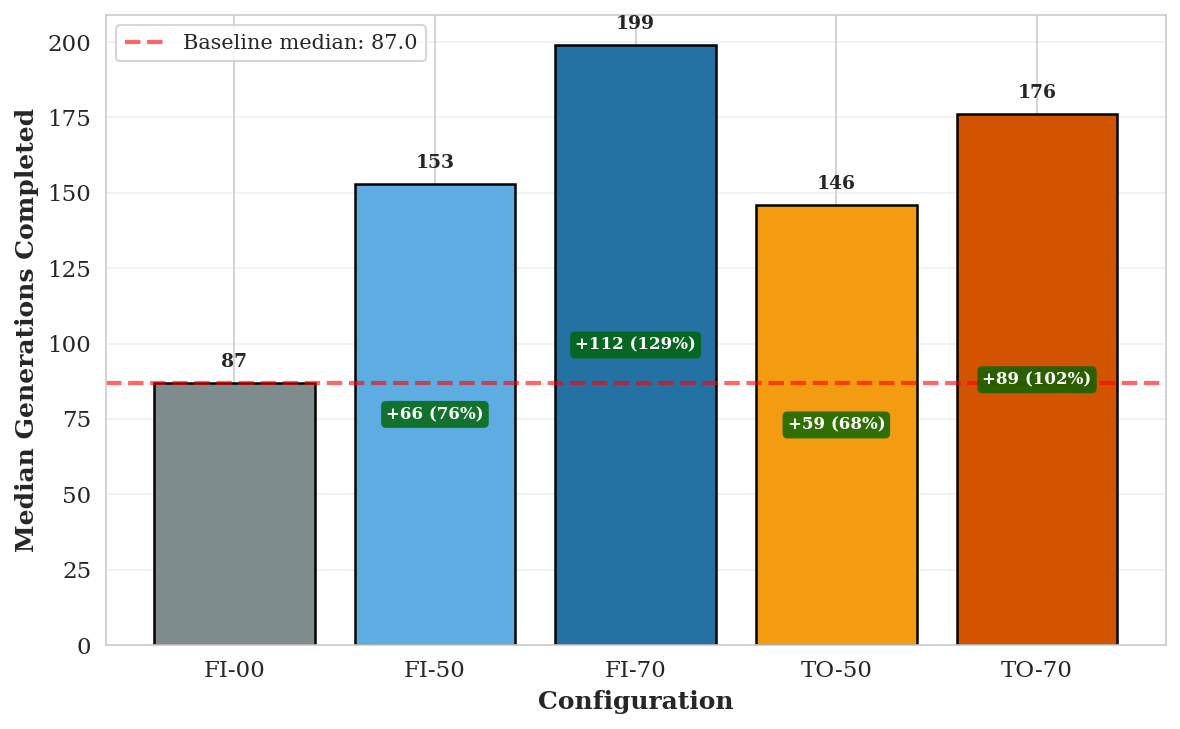

Figure saved as: data/figure_generations_completed.pdf / data/figure_generations_completed.png


In [5]:
gen_stats = results_df.groupby('config')['final_iteration'].agg(['mean', 'median']).reindex(CONFIG_ORDER)
print(gen_stats.round(2))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(range(len(CONFIG_ORDER)), gen_stats['median'], color=[CONFIG_COLORS[c] for c in CONFIG_ORDER],
       edgecolor='black', linewidth=1.2)

baseline_median = gen_stats.loc['FI-00', 'median']
ax.axhline(baseline_median, color='red', linestyle='--', linewidth=2, alpha=0.6,
           label=f'Baseline median: {baseline_median:.1f}')

ax.set_xlabel('Configuration', fontsize=12, fontweight='bold')
ax.set_ylabel('Median Generations Completed', fontsize=12, fontweight='bold')
#ax.set_title('Generations Completed by Configuration', fontsize=13, fontweight='bold', pad=15)
ax.set_xticks(range(len(CONFIG_ORDER)))
ax.set_xticklabels(CONFIG_ORDER, fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.legend(loc='upper left', fontsize=10)

for i, cfg in enumerate(CONFIG_ORDER):
    median_val = gen_stats.loc[cfg, 'median']
    ax.text(i, median_val + 4, f'{median_val:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    if cfg != 'FI-00':
        increase = median_val - baseline_median
        pct = (increase / baseline_median) * 100 if baseline_median > 0 else 0.0
        ax.text(i, median_val * 0.5, f'+{increase:.0f} ({pct:.0f}%)', ha='center', va='center',
                fontsize=8, color='white', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='darkgreen', edgecolor='none', alpha=0.8))

plt.tight_layout()
out_local_pdf = BASE_PATH / 'figure_generations_completed.pdf'
out_local_png = BASE_PATH / 'figure_generations_completed.png'
plt.savefig(out_local_pdf, bbox_inches='tight')
plt.savefig(out_local_png, bbox_inches='tight', dpi=300)
plt.show()
print(f'Figure saved as: {out_local_pdf} / {out_local_png}')

if EXPORT_TO_THESIS:
    out_thesis_pdf = DIAGRAM_DIR / out_local_pdf.name
    shutil.copy2(out_local_pdf, out_thesis_pdf)
    print(f'Copied to: {out_thesis_pdf}')

## Statistical Tests Table (`latex_table_statistical_tests.tex`)

In [6]:
def format_p(p: float) -> str:
    if pd.isna(p):
        return ''
    if p < 0.001:
        return '$< 0.001$'
    return f'${p:.3f}$'

def format_d(d: float) -> str:
    if pd.isna(d):
        return ''
    return f'${d:.2f}$'

main_baseline = stats_main_df[stats_main_df['comparison'].str.startswith('Baseline vs')]
add_baseline = stats_add_df[stats_add_df['comparison'].str.startswith('Baseline vs')]

main_baseline = main_baseline.rename(columns={'config2': 'config'})
add_baseline = add_baseline.rename(columns={'config2': 'config'})
merged = pd.merge(main_baseline, add_baseline, on=['comparison', 'config', 'config1'], suffixes=('_main', '_add'))
merged = merged.set_index('config').loc[['FI-50', 'FI-70', 'TO-50', 'TO-70']]

lines = []
lines.append(r"\begin{table}")
lines.append(r"\centering")
lines.append(r"\caption{Statistical Significance Tests for All Metrics (vs FI-00 Baseline)}")
lines.append(r"\label{tab:statistical-tests}")
lines.append(r"\begin{tabular}{llcc}")
lines.append(r"\toprule")
# Optional commented header line (kept to match reference table)
lines.append(r"%\textbf{Metric}           & \textbf{Config} & \textbf{p-value} & \textbf{Effect Size} \\")
lines.append(r"\textbf{Metric}           & \textbf{Config} & \textbf{p-value} & \textbf{Effect Size} \\")
lines.append(r"\midrule")

def add_metric_row(metric_name, cfg, p_col, d_col):
    p = merged.loc[cfg, p_col]
    d = merged.loc[cfg, d_col]
    lines.append(fr"{metric_name} & {cfg} & {format_p(p)} & {format_d(d)} \\")

for cfg in ['FI-50', 'FI-70', 'TO-50', 'TO-70']:
    add_metric_row('Time to Repair', cfg, 'p_value_time', 'effect_size_time')
    add_metric_row('Test Executions', cfg, 'p_value_executions', 'effect_size_executions')
    add_metric_row('Time to First Improvement', cfg, 'p_value_time_first_improvement', 'effect_size_time_first_improvement')
    add_metric_row('Generations Completed', cfg, 'p_value_generations', 'effect_size_generations')
    if cfg != 'TO-70':
        lines.append(r"\midrule")

lines.append(r"\bottomrule")
lines.append(r"\end{tabular}")

# Simple note below the table (no minipage)
lines.append(r"\par\smallskip")
lines.append(r"{\footnotesize\textit{Note.} Significance level $\alpha = 0.05$. Effect sizes are Cohen's $d$.}\par")

lines.append(r"\end{table}")

out_local = BASE_PATH / 'latex_table_statistical_tests.tex'
out_local.write_text("\n".join(lines))
print(f'Saved LaTeX table to: {out_local}')

if EXPORT_TO_THESIS:
    out_thesis = TABLES_DIR / out_local.name
    shutil.copy2(out_local, out_thesis)
    print(f'Copied to: {out_thesis}')

Saved LaTeX table to: data/latex_table_statistical_tests.tex


## Surrogate Model Comparison (`figure_model_comparison.*`)


This section recreates the **FI vs TO surrogate model comparison** figure used in the thesis.
It analyzes chromosomes that were both predicted by the surrogate models and later evaluated with actual test execution,
and generates `figure_model_comparison.pdf/png` showing (a) error distributions and (b) MAE/RMSE for the two models.

In [7]:
# Build surrogate-model comparison data (FI vs TO)
import os

RESULTS_DIR = Path('../temp_results/')

if not RESULTS_DIR.exists():
    raise FileNotFoundError(f'Results folder not found: {RESULTS_DIR}')

# Unified tasks.csv (baseline + surrogate) and experiment range filter (as in 03_create_raw_data.ipynb)
tasks_csv = RESULTS_DIR / 'tasks.csv'
if not tasks_csv.exists():
    raise FileNotFoundError(f'Tasks CSV not found: {tasks_csv}')

# Configure which experiment numbers (job_id) to include
EXP_MIN = 0
EXP_MAX = 3075

surrogate_tasks = pd.read_csv(tasks_csv)
surrogate_tasks = surrogate_tasks[(surrogate_tasks['job_id'] >= EXP_MIN) & (surrogate_tasks['job_id'] <= EXP_MAX)]
job_to_config = dict(zip(surrogate_tasks['job_id'], surrogate_tasks['config']))

print(f'Surrogate model tasks loaded in range [{EXP_MIN}, {EXP_MAX}]: {len(surrogate_tasks)} rows')
print('Configuration distribution (raw IDs, filtered range):')
print(surrogate_tasks['config'].value_counts())

surrogate_dirs = [
    d
    for d in os.listdir(RESULTS_DIR)
    if (RESULTS_DIR / d).is_dir() and d.isdigit() and EXP_MIN <= int(d) <= EXP_MAX
]
print(f"\nFound {len(surrogate_dirs)} surrogate model run directories in range [{EXP_MIN}, {EXP_MAX}]")
print('Loading runs and matching predicted vs evaluated chromosomes...')

all_comparisons = []

for run_dir in sorted(surrogate_dirs, key=int):
    run_path = RESULTS_DIR / run_dir / 'output.csv'
    if not run_path.exists():
        continue

    run_id = int(run_dir)
    raw_config = job_to_config.get(run_id, 'unknown')
    mapped_config = CONFIG_MAPPING.get(raw_config, raw_config)
    # Derive model type directly from mapped config label
    if mapped_config.startswith('FI-'):
        model_type = 'fitness'
    elif mapped_config.startswith('TO-'):
        model_type = 'testoutcome'
    else:
        model_type = 'unknown'
    
    print(run_path)
    run_df = pd.read_csv(run_path, low_memory=False)


    predicted = run_df[run_df['fitnessEvalType'] == 'fitnessPrediction'].copy()
    evaluated = run_df[run_df['fitnessEvalType'] == 'fitnessEvaluation'].copy()

    common_hashes = set(predicted['hashCode']) & set(evaluated['hashCode'])

    for hash_code in common_hashes:
        pred_rows = predicted[predicted['hashCode'] == hash_code]
        eval_rows = evaluated[evaluated['hashCode'] == hash_code]
        if len(pred_rows) == 0 or len(eval_rows) == 0:
            continue
        pred_row = pred_rows.iloc[0]
        eval_row = eval_rows.iloc[0]
        all_comparisons.append({
            'run_id': run_dir,
            'config': mapped_config,
            'model_type': model_type,
            'hashCode': hash_code,
            'predicted_fitness': pred_row['fitness'],
            'actual_fitness': eval_row['fitness'],
            'pred_iteration': pred_row['iteration'],
            'eval_iteration': eval_row['iteration']
        })

comparisons_df = pd.DataFrame(all_comparisons)
print(f"\nFound {len(comparisons_df)} chromosomes with both predictions and evaluations")
print(f"From {len(comparisons_df['run_id'].unique())} different runs")

comparisons_df['fitness_error'] = comparisons_df['predicted_fitness'] - comparisons_df['actual_fitness']
comparisons_df['fitness_abs_error'] = comparisons_df['fitness_error'].abs()
comparisons_df['fitness_squared_error'] = comparisons_df['fitness_error'] ** 2

comparisons_df['fitness_pct_error'] = np.where(
    comparisons_df['actual_fitness'].abs() > 0,
    (comparisons_df['fitness_abs_error'] / comparisons_df['actual_fitness'].abs()) * 100,
    0
)

fi_data = comparisons_df[comparisons_df['model_type'] == 'fitness']
to_data = comparisons_df[comparisons_df['model_type'] == 'testoutcome']

print('\nData prepared for surrogate-model visualization:')
print(f'  FI model chromosomes: {len(fi_data):,}')
print(f'  TO model chromosomes: {len(to_data):,}')

Surrogate model tasks loaded in range [0, 3075]: 3075 rows
Configuration distribution (raw IDs, filtered range):
config
genProg-surrogate-model-fi-00    615
genProg-surrogate-model-fi-05    615
genProg-surrogate-model-fi-07    615
genProg-surrogate-model-to-05    615
genProg-surrogate-model-to-07    615
Name: count, dtype: int64

Found 3075 surrogate model run directories in range [0, 3075]
Loading runs and matching predicted vs evaluated chromosomes...
../temp_results/1/output.csv
../temp_results/2/output.csv
../temp_results/3/output.csv
../temp_results/4/output.csv
../temp_results/5/output.csv
../temp_results/6/output.csv
../temp_results/7/output.csv
../temp_results/8/output.csv
../temp_results/9/output.csv
../temp_results/10/output.csv
../temp_results/11/output.csv
../temp_results/12/output.csv
../temp_results/13/output.csv
../temp_results/14/output.csv
../temp_results/15/output.csv
../temp_results/16/output.csv
../temp_results/17/output.csv
../temp_results/18/output.csv
../temp_res

In [8]:
# Table: Real-World Fitness Prediction Accuracy (latex_table_realworld_accuracy.tex)

# Overall, FI, and TO model metrics on chromosomes evaluated during repair
print("="*80)
print("TABLE: Real-World Fitness Prediction Accuracy During Repair")
print("="*80)

table1 = r"""\begin{table}
\centering
\caption{Real-World Fitness Prediction Accuracy During Repair}
\label{tab:prediction_accuracy_realworld}
\begin{tabular}{lrrr}
\toprule
\textbf{Metric} & \textbf{Overall} & \textbf{FI Model} & \textbf{TO Model} \\
\midrule
Chromosomes Analyzed & """ + f"{len(comparisons_df):,}" + r""" & """ + f"{len(fi_data):,}" + r""" & """ + f"{len(to_data):,}" + r""" \\
\midrule
\multicolumn{4}{l}{\textbf{Fitness Prediction Accuracy}} \\
"""

table1 += f"Mean Absolute Error (MAE) & {comparisons_df['fitness_abs_error'].mean():.2f} & {fi_data['fitness_abs_error'].mean():.2f} & {to_data['fitness_abs_error'].mean():.2f} \\\\\n"
table1 += f"Root Mean Squared Error (RMSE) & {np.sqrt(comparisons_df['fitness_squared_error'].mean()):.2f} & {np.sqrt(fi_data['fitness_squared_error'].mean()):.2f} & {np.sqrt(to_data['fitness_squared_error'].mean()):.2f} \\\\\n"
table1 += f"Median Absolute Error & {comparisons_df['fitness_abs_error'].median():.2f} & {fi_data['fitness_abs_error'].median():.2f} & {to_data['fitness_abs_error'].median():.2f} \\\\\n"
table1 += f"Mean Percentage Error & {comparisons_df['fitness_pct_error'].mean():.1f}\\% & {fi_data['fitness_pct_error'].mean():.1f}\\% & {to_data['fitness_pct_error'].mean():.1f}\\% \\\\\n"
table1 += f"Median Percentage Error & {comparisons_df['fitness_pct_error'].median():.1f}\\% & {fi_data['fitness_pct_error'].median():.1f}\\% & {to_data['fitness_pct_error'].median():.1f}\\% \\\\\n"
table1 += f"Standard Deviation & {comparisons_df['fitness_abs_error'].std():.2f} & {fi_data['fitness_abs_error'].std():.2f} & {to_data['fitness_abs_error'].std():.2f} \\\\\n"

table1 += r"""\bottomrule
\end{tabular}
\end{table}
"""

out_local = BASE_PATH / 'latex_table_realworld_accuracy.tex'
out_local.write_text(table1)

print(table1)
print(f"Saved: {out_local.name}")
print("  USAGE: Include in Experiments & Results chapter (Real-World Validation section)")
print("  NOTE: Validates models on actual repair data during genetic programming runs")
print(f"\nKEY FINDING: FI model has {(to_data['fitness_abs_error'].mean() - fi_data['fitness_abs_error'].mean()) / fi_data['fitness_abs_error'].mean() * 100:.1f}% lower MAE than TO model\n")

if EXPORT_TO_THESIS:
    TABLES_DIR.mkdir(parents=True, exist_ok=True)
    out_thesis = TABLES_DIR / out_local.name
    shutil.copy2(out_local, out_thesis)
    print(f'Copied to thesis tables/: {out_thesis}')

TABLE: Real-World Fitness Prediction Accuracy During Repair
\begin{table}
\centering
\caption{Real-World Fitness Prediction Accuracy During Repair}
\label{tab:prediction_accuracy_realworld}
\begin{tabular}{lrrr}
\toprule
\textbf{Metric} & \textbf{Overall} & \textbf{FI Model} & \textbf{TO Model} \\
\midrule
Chromosomes Analyzed & 2,057,795 & 1,068,093 & 989,702 \\
\midrule
\multicolumn{4}{l}{\textbf{Fitness Prediction Accuracy}} \\
Mean Absolute Error (MAE) & 6.82 & 6.47 & 7.20 \\
Root Mean Squared Error (RMSE) & 8.06 & 7.58 & 8.54 \\
Median Absolute Error & 6.63 & 6.56 & 6.72 \\
Mean Percentage Error & 45.0\% & 49.9\% & 39.7\% \\
Median Percentage Error & 38.2\% & 42.2\% & 35.3\% \\
Standard Deviation & 4.29 & 3.96 & 4.59 \\
\bottomrule
\end{tabular}
\end{table}

Saved: latex_table_realworld_accuracy.tex
  USAGE: Include in Experiments & Results chapter (Real-World Validation section)
  NOTE: Validates models on actual repair data during genetic programming runs

KEY FINDING: FI model 

/var/folders/ld/bgn55ct90rbfyh1dnn5gfq9m0000gn/T/ipykernel_14827/1181556115.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=LABELS,


Figure saved as: data/figure_model_comparison.pdf / data/figure_model_comparison.png
EXPORT_TO_THESIS is False – not copying into thesis diagram/.


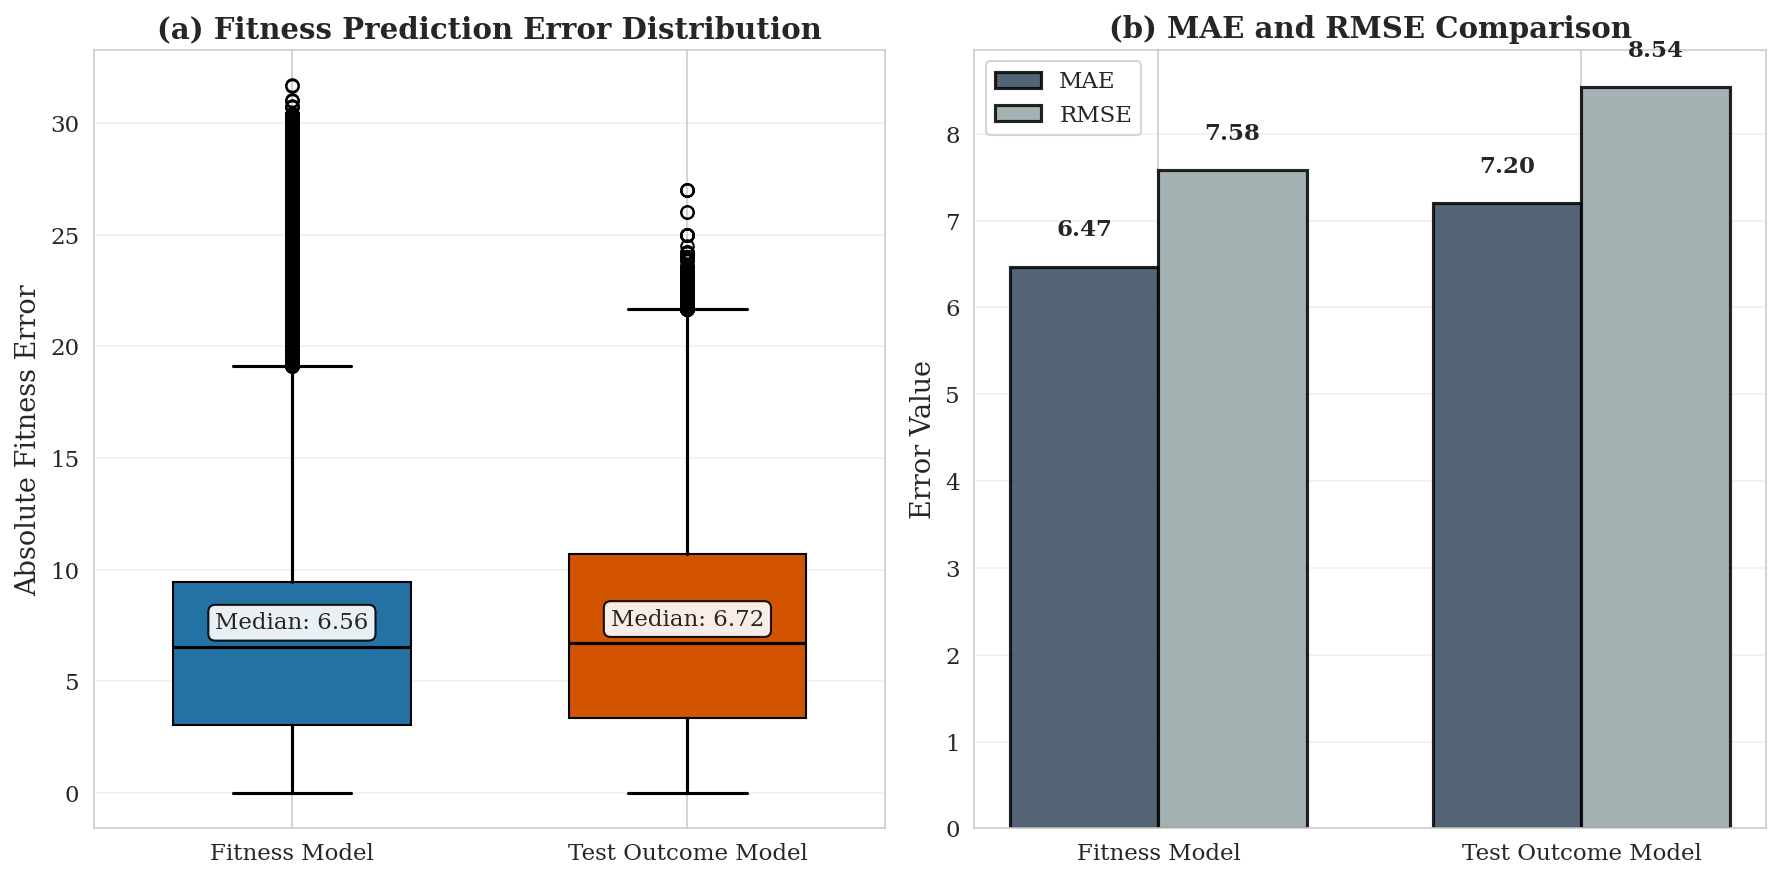

In [9]:
# Figure: Model Comparison Overview (Fitness Prediction Only)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')
fig.patch.set_facecolor('white')

# Define clean colors for publication
FI_COLOR = '#2471a3'  # Dark blue
TO_COLOR = '#d35400'  # Dark orange

LABELS = ['Fitness Model', 'Test Outcome Model']

# Left: Fitness Error Distribution (Box Plot)
ax = axes[0]
ax.set_facecolor('white')
data_to_plot = [fi_data['fitness_abs_error'], to_data['fitness_abs_error']]
bp = ax.boxplot(data_to_plot, labels=LABELS,
                patch_artist=True, widths=0.6)
bp['boxes'][0].set_facecolor(FI_COLOR)
bp['boxes'][1].set_facecolor(TO_COLOR)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)
ax.set_ylabel('Absolute Fitness Error', fontsize=13)
ax.set_title('(a) Fitness Prediction Error Distribution', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(axis='both', which='major', labelsize=11)

median_fi = fi_data['fitness_abs_error'].median()
median_to = to_data['fitness_abs_error'].median()
ax.text(1, median_fi + 0.8, f'Median: {median_fi:.2f}',
        ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='black'))
ax.text(2, median_to + 0.8, f'Median: {median_to:.2f}',
        ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='black'))

# Right: MAE and RMSE Comparison
ax = axes[1]
ax.set_facecolor('white')
x = np.arange(2)
width = 0.35
fi_mae = fi_data['fitness_abs_error'].mean()
to_mae = to_data['fitness_abs_error'].mean()
fi_rmse = np.sqrt(fi_data['fitness_squared_error'].mean())
to_rmse = np.sqrt(to_data['fitness_squared_error'].mean())

MAE_COLOR = '#34495e'   # Dark gray-blue for MAE
RMSE_COLOR = '#95a5a6'  # Light gray for RMSE

bars1 = ax.bar(x - width/2, [fi_mae, to_mae], width,
               label='MAE', color=MAE_COLOR,
               alpha=0.85, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, [fi_rmse, to_rmse], width,
               label='RMSE', color=RMSE_COLOR,
               alpha=0.85, edgecolor='black', linewidth=1.5)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Error Value', fontsize=13)
ax.set_title('(b) MAE and RMSE Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(LABELS, fontsize=11)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()

# Save into local data/ folder (replication package canonical output)
out_pdf = BASE_PATH / 'figure_model_comparison.pdf'
out_png = BASE_PATH / 'figure_model_comparison.png'
plt.savefig(out_pdf, bbox_inches='tight', dpi=300, facecolor='white')
plt.savefig(out_png, bbox_inches='tight', dpi=300, facecolor='white')
print(f'Figure saved as: {out_pdf} / {out_png}')

# Optionally copy into thesis diagram/ folder
if EXPORT_TO_THESIS:
    DIAGRAM_DIR.mkdir(parents=True, exist_ok=True)
    thesis_pdf = DIAGRAM_DIR / out_pdf.name
    thesis_png = DIAGRAM_DIR / out_png.name
    thesis_pdf.write_bytes(out_pdf.read_bytes())
    thesis_png.write_bytes(out_png.read_bytes())
    print(f'Copied to thesis: {thesis_pdf}')
    print(f'Copied to thesis: {thesis_png}')
else:
    print('EXPORT_TO_THESIS is False – not copying into thesis diagram/.')

plt.show()

## Output check


This section lists the generated files in `data/` and (if enabled) verifies that the thesis folders contain the expected outputs.

In [10]:
generated_local = sorted([p.name for p in BASE_PATH.glob('latex_table_*.tex')]) + sorted([p.name for p in BASE_PATH.glob('figure_*.pdf')])
print('Generated in data/:')
for name in generated_local:
    print(f'  - {name}')

if EXPORT_TO_THESIS:
    expected_tables = ['latex_table_time_efficiency.tex', 'latex_table_statistical_tests.tex', 'latex_table_realworld_accuracy.tex']
    expected_figs = ['figure_repair_duration_distribution.pdf', 'figure_stopping_conditions.pdf', 'figure_generations_completed.pdf', 'figure_model_comparison.pdf']
    print('\nThesis tables present:')
    for name in expected_tables:
        print(f'  - {name}: {(TABLES_DIR / name).exists()}')
    print('\nThesis figures present:')
    for name in expected_figs:
        print(f'  - {name}: {(DIAGRAM_DIR / name).exists()}')

Generated in data/:
  - latex_table_realworld_accuracy.tex
  - latex_table_robustness_sign_tests.tex
  - latex_table_statistical_tests.tex
  - latex_table_time_efficiency.tex
  - figure_generations_completed.pdf
  - figure_model_comparison.pdf
  - figure_repair_duration_distribution.pdf
  - figure_stopping_conditions.pdf
